<a href="https://colab.research.google.com/github/SakshamJain9999/Exploratory-Data-Analysis-Theory-DA-1/blob/main/Exploratory_Data_Analysis_Theory_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import LocalOutlierFactor
from sklearn.manifold import MDS
from sklearn.svm import SVC

In [5]:
data = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

### Display dataset dimensions and summary

In [6]:
print("Dataset Dimensions:", data.shape)
print("Dataset Summary:")
print(data.describe())

Dataset Dimensions: (299, 13)
Dataset Summary:
              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000

###Check for missing values

In [7]:
print("Missing Values:", data.isnull().sum())

Missing Values: age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         1
smoking                     0
time                        0
DEATH_EVENT                 1
dtype: int64


# Module 2:
##Data Transformation
## Deduplication

In [8]:
data.drop_duplicates(inplace=True)

### Discretization/Binning for 'age' into categories

In [12]:
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
data['age_binned'] = binner.fit_transform(data[['age']])
print(data['age_binned'])

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
294    1.0
295    0.0
296    0.0
297    0.0
298    0.0
Name: age_binned, Length: 299, dtype: float64


### Handling Missing Data (Imputation - Mean)

In [11]:
data.replace('?', np.nan, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')
imputer = SimpleImputer(strategy="mean")
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
print("Missing Values After Imputation:", data_imputed.isnull().sum())


Missing Values After Imputation: age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
age_binned                  0
dtype: int64


# Module 3:
### Correlation, Univariate, Bivariate, Multivariate Analysis
### Univariate Analysis (histograms for all features)

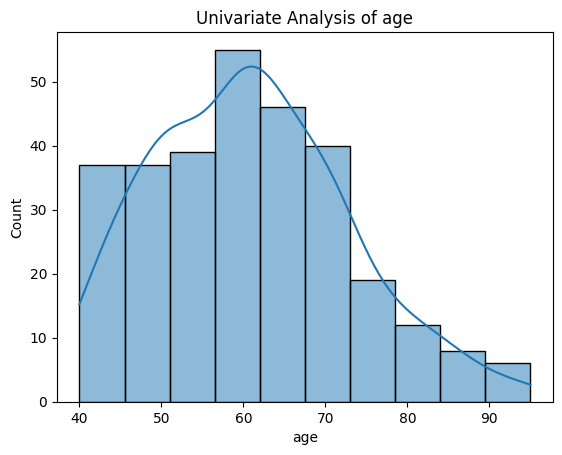

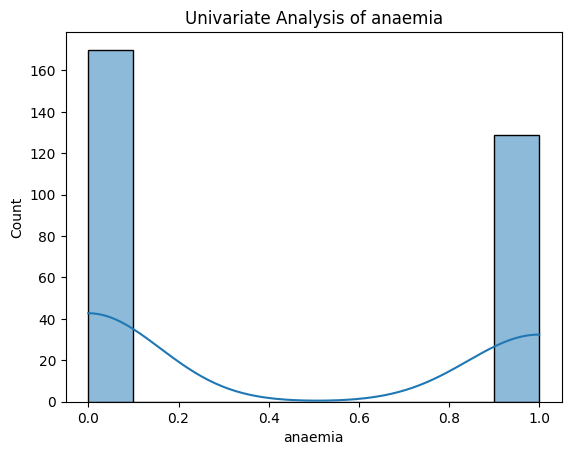

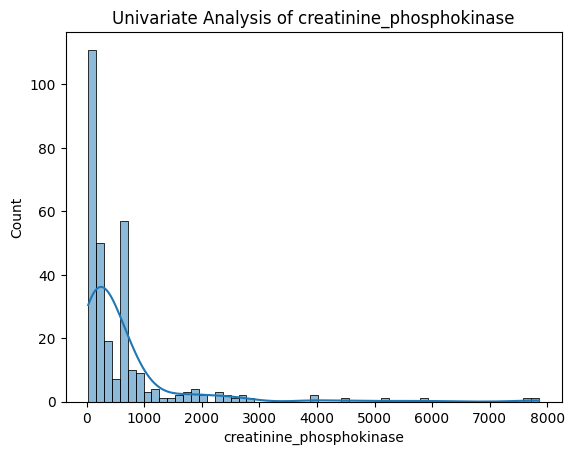

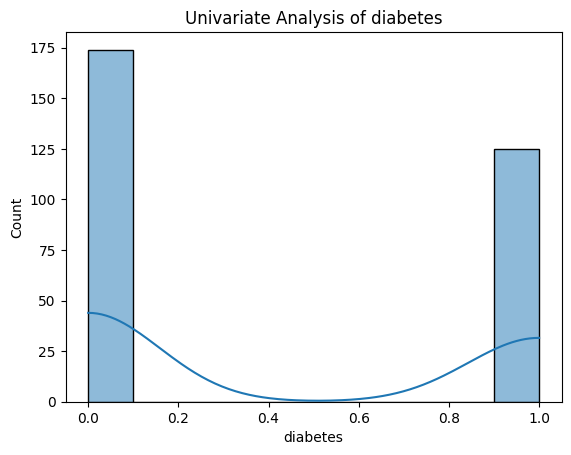

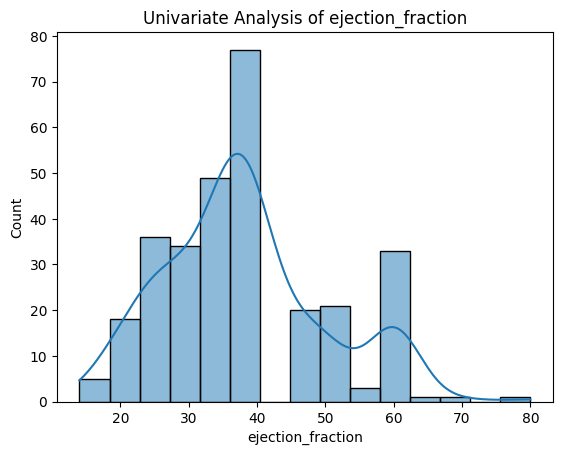

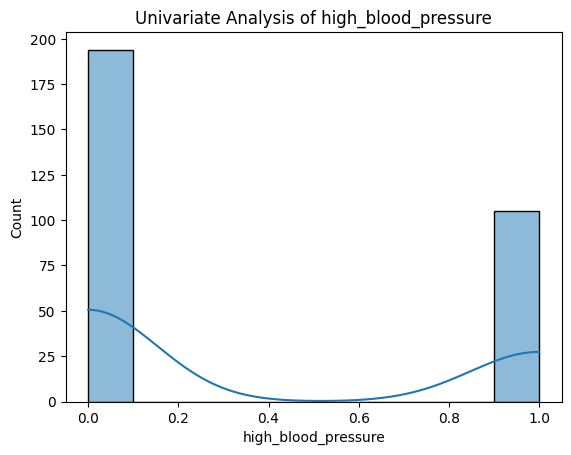

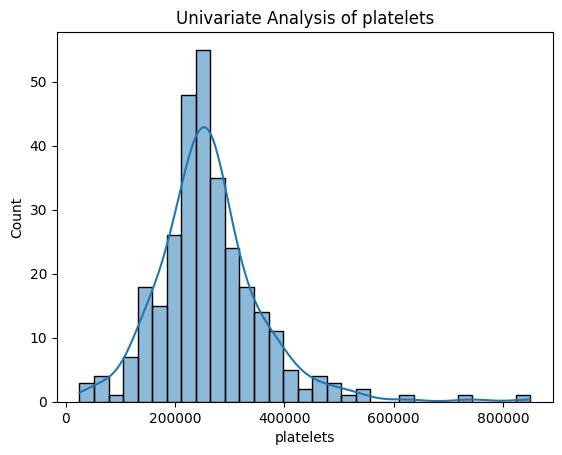

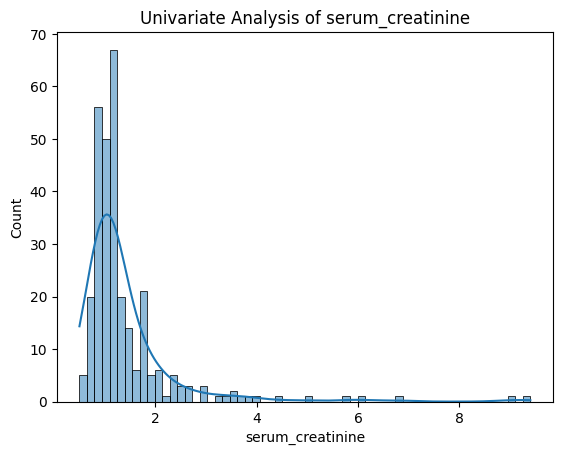

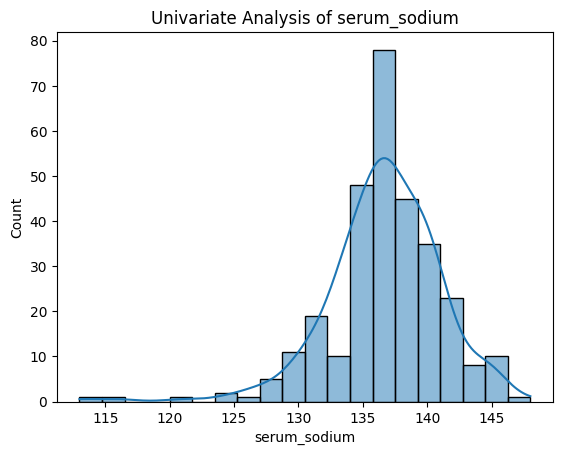

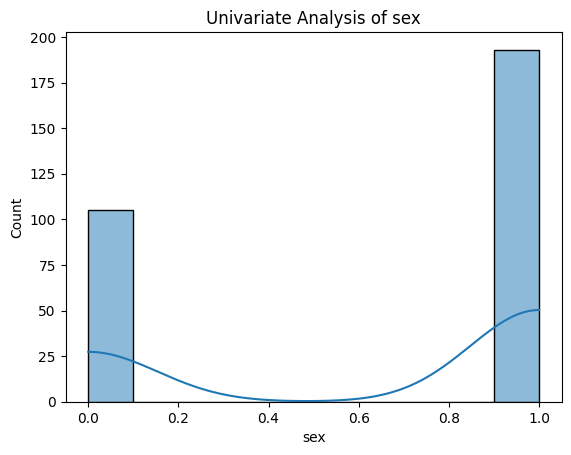

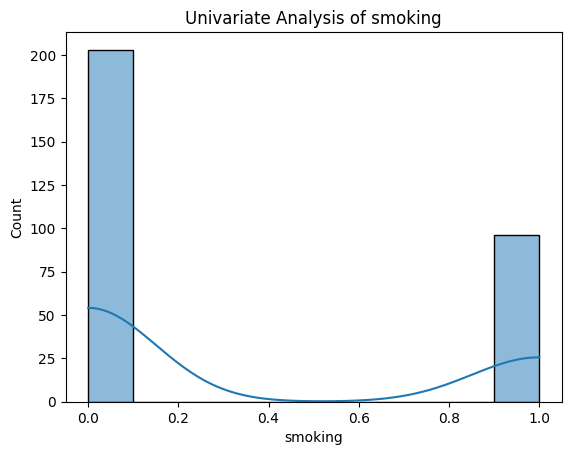

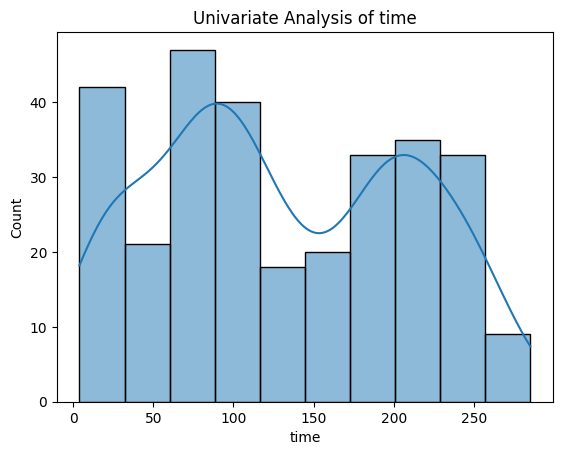

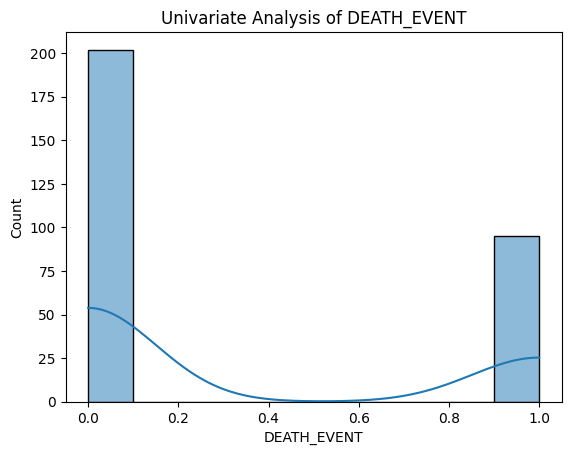

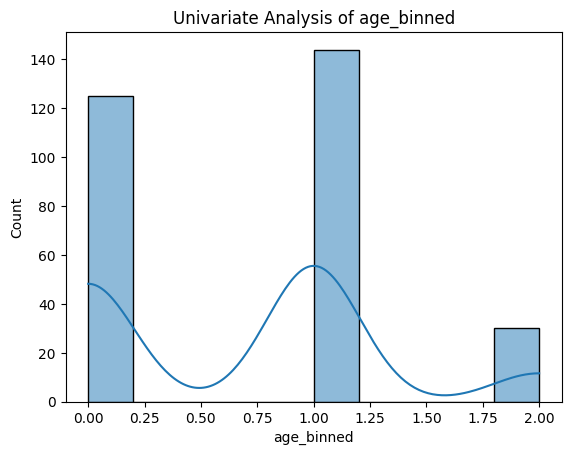

In [13]:
for col in data.columns:
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title(f'Univariate Analysis of {col}')
    plt.show()

### Bivariate Analysis - Pairplot for feature relationships

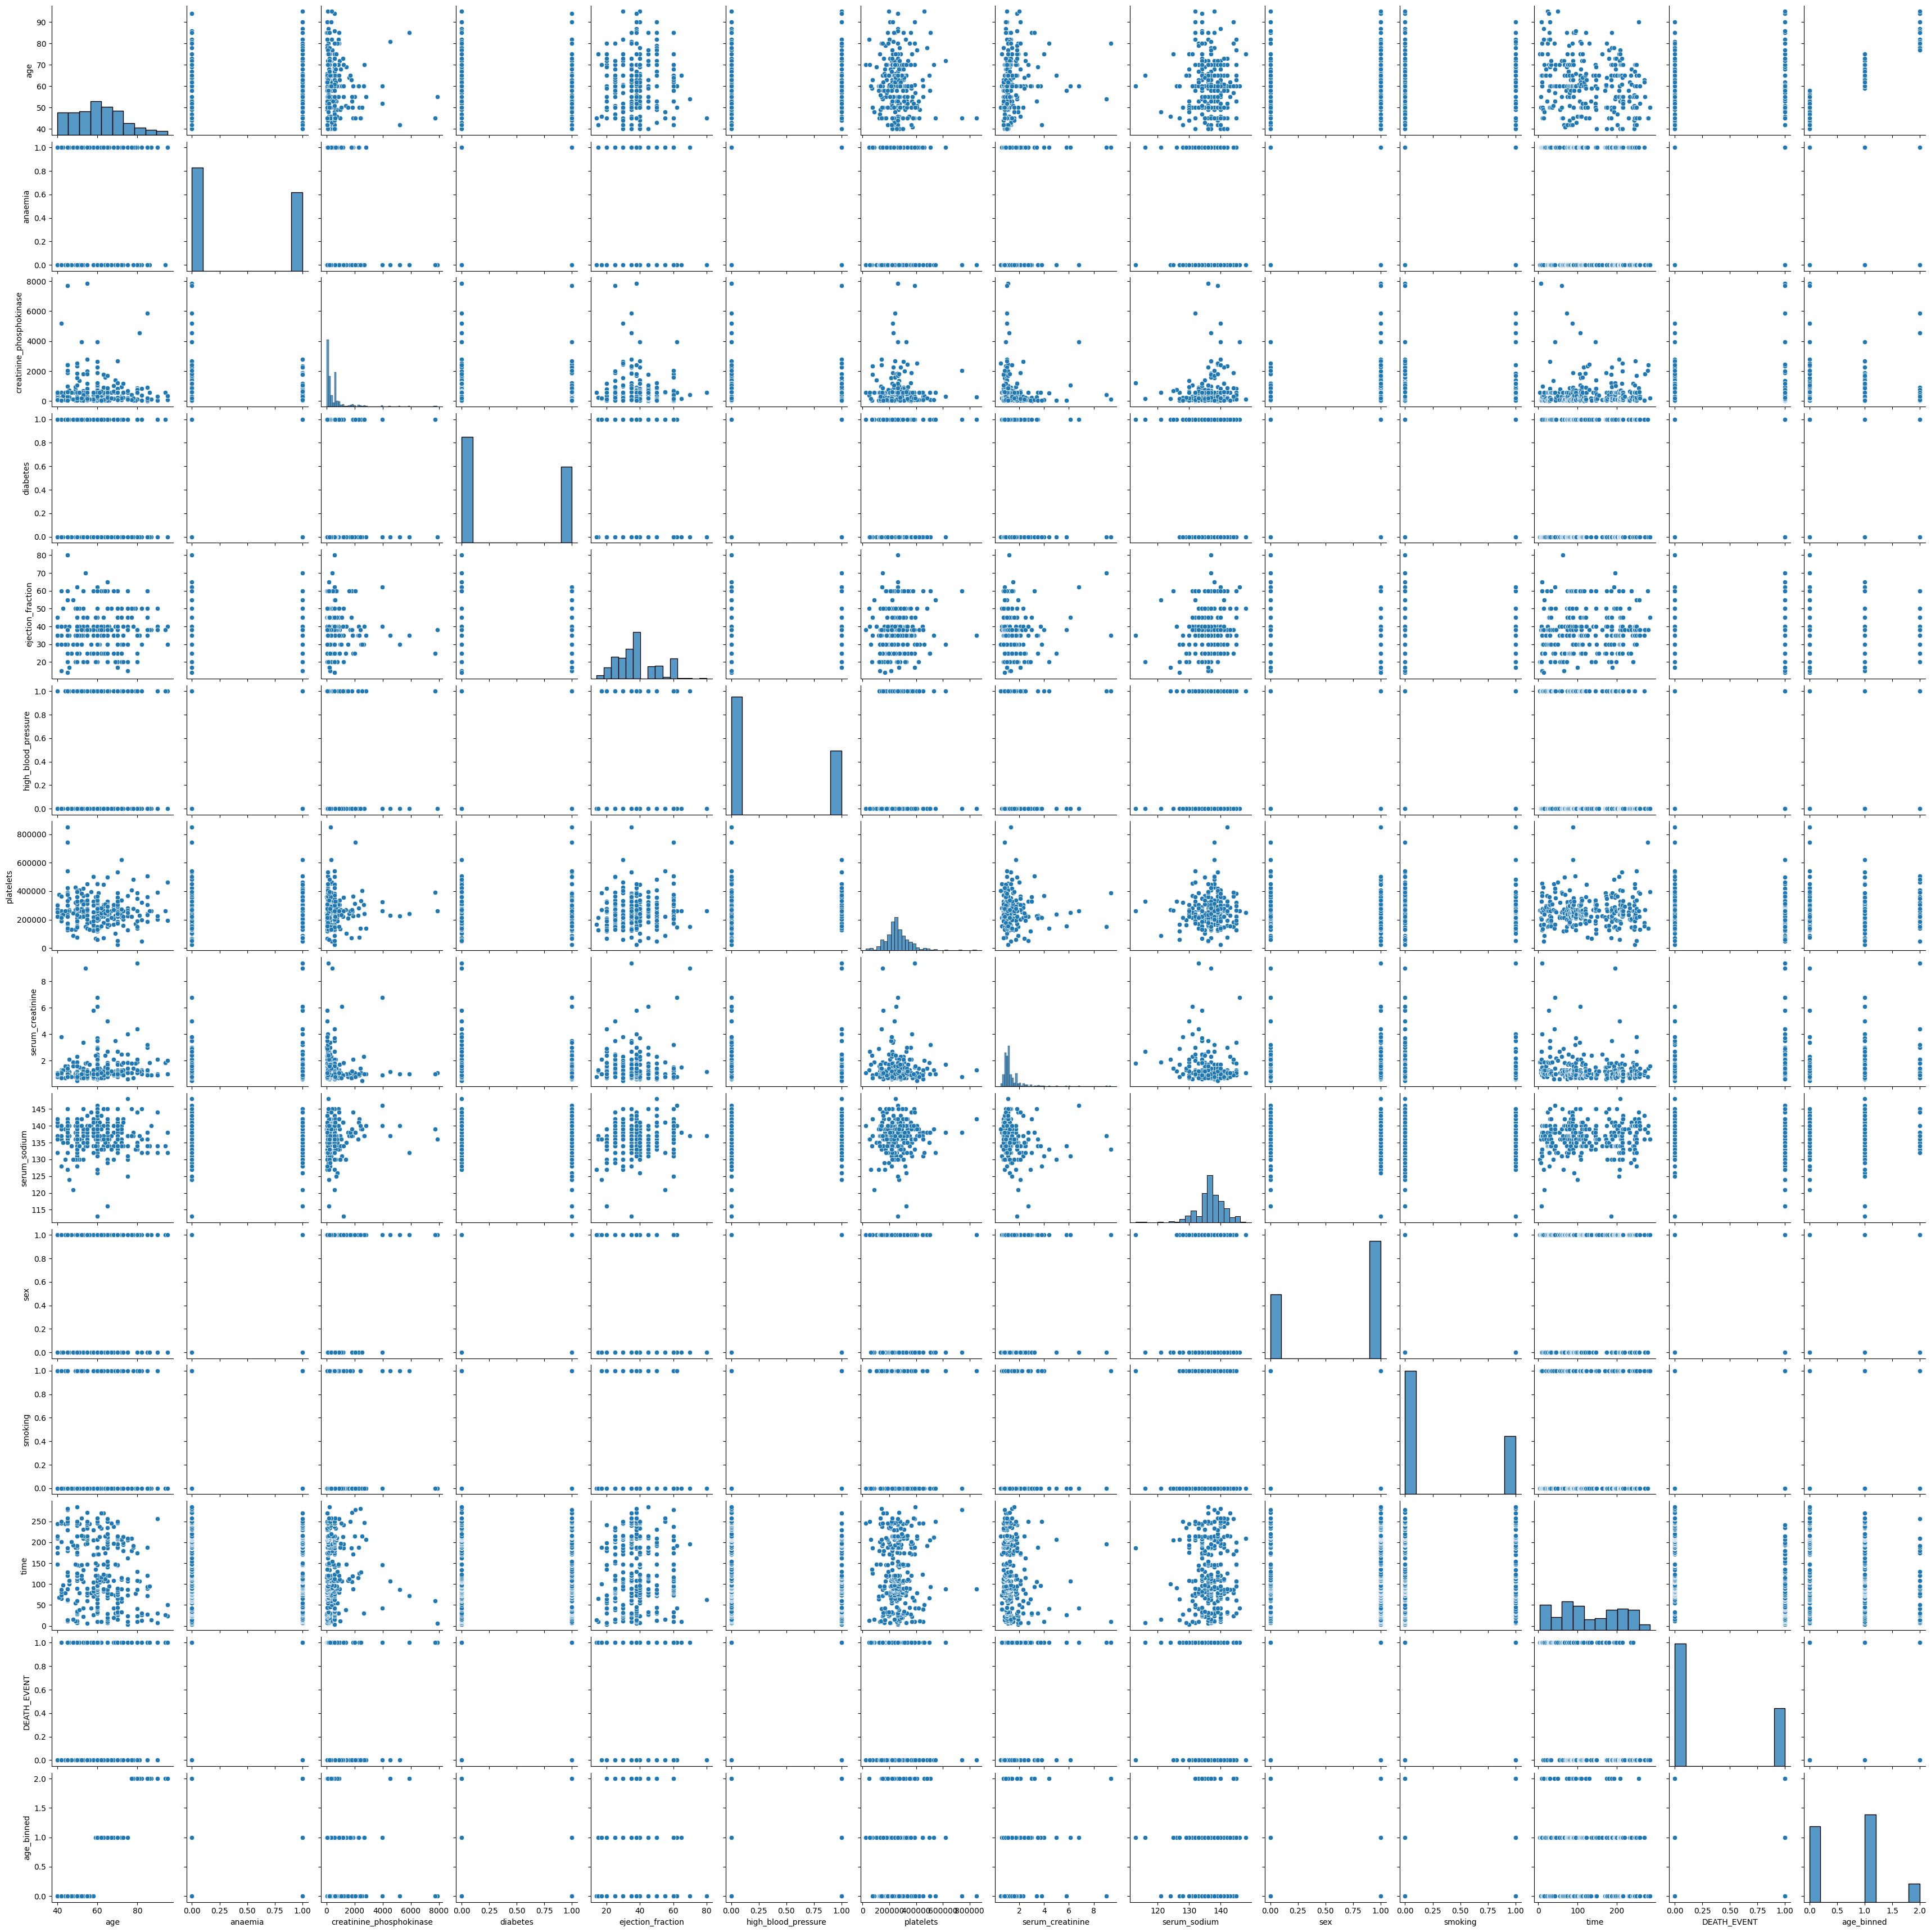

In [14]:
sns.pairplot(data)
plt.show()

### Multivariate Analysis - Correlation Heatmap

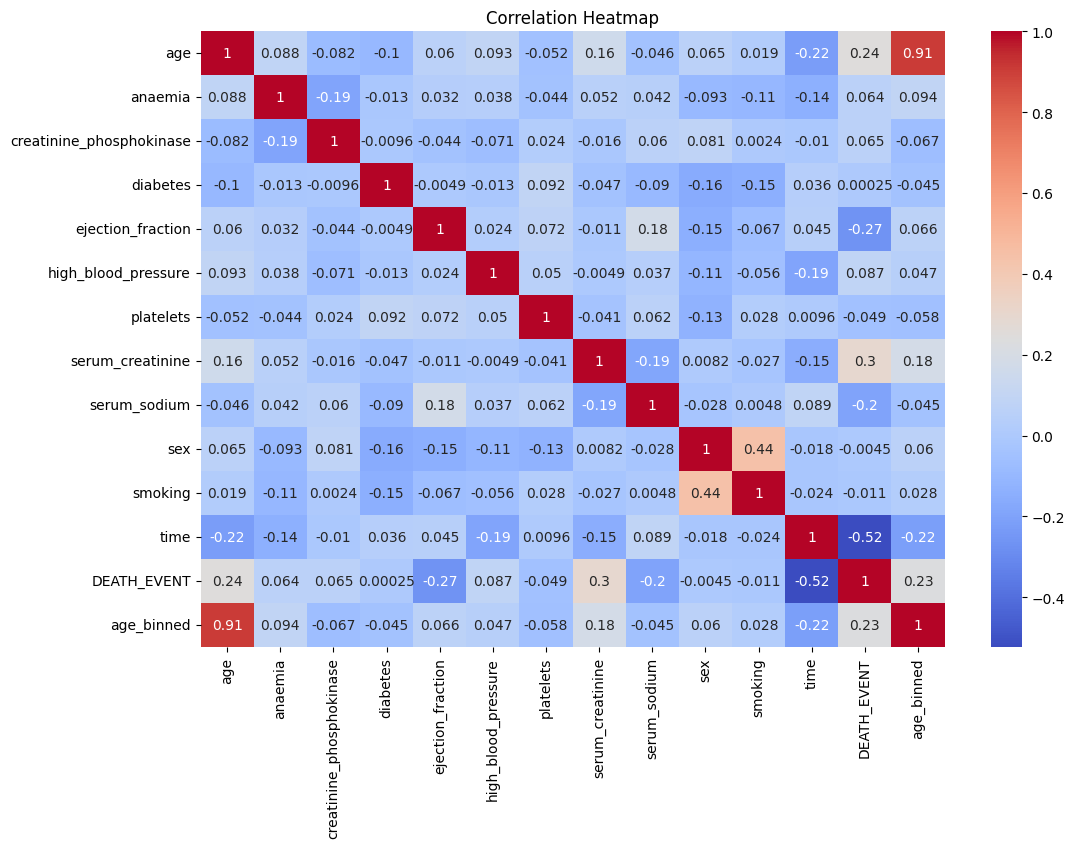

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Module 4:
###Data Summarization and Visualization
### Statistical summaries

In [16]:
print("Statistical Summary of Dataset:\n", data.describe(include='all'))

Statistical Summary of Dataset:
               age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%    

### Scatter, Dot, and Bar Plots

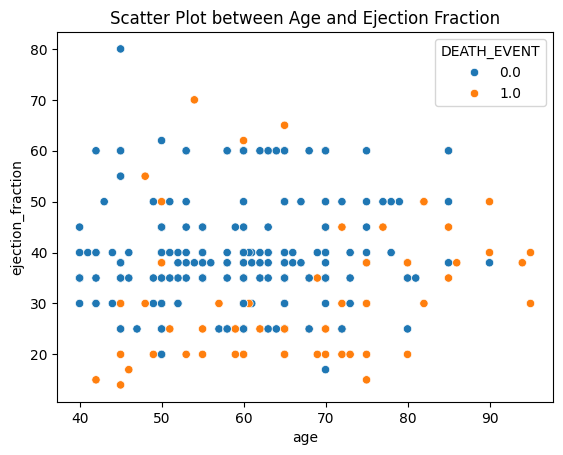

In [17]:
sns.scatterplot(x='age', y='ejection_fraction', hue='DEATH_EVENT', data=data)
plt.title('Scatter Plot between Age and Ejection Fraction')
plt.show()

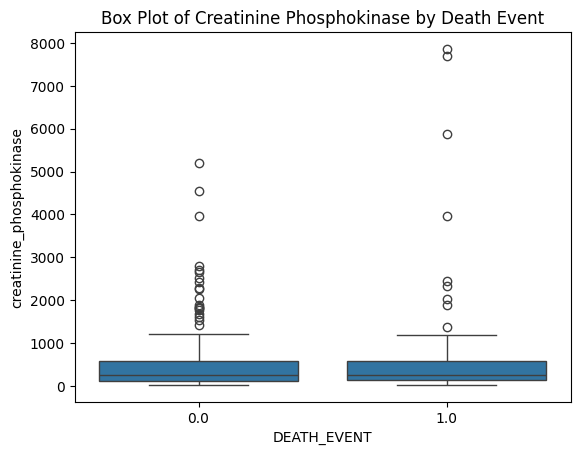

In [18]:
sns.boxplot(x='DEATH_EVENT', y='creatinine_phosphokinase', data=data)
plt.title('Box Plot of Creatinine Phosphokinase by Death Event')
plt.show()

# Module 5:
###Clustering Algorithms
### KMeans Clustering

KMeans Cluster Centers:
[[6.04918033e+01 3.98907104e-01 6.43087432e+02 4.37158470e-01
  3.83934426e+01 3.44262295e-01 2.67475141e+05 1.34021858e+00
  1.36311475e+02 6.10096454e-01 2.95081967e-01 1.28590164e+02
  2.82184320e-01 6.55737705e-01]
 [5.98943171e+01 4.14634146e-01 5.93121951e+02 4.39024390e-01
  3.91463415e+01 3.90243902e-01 4.37097561e+05 1.48121951e+00
  1.37658537e+02 6.09756098e-01 3.65853659e-01 1.39121951e+02
  3.41463415e-01 6.34146341e-01]
 [6.21822267e+01 5.20000000e-01 4.26226667e+02 3.60000000e-01
  3.67466667e+01 3.46666667e-01 1.58334667e+05 1.47706667e+00
  1.36826667e+02 7.60000000e-01 3.60000000e-01 1.29978434e+02
  4.00000000e-01 7.73333333e-01]]
KMeans Labels (First 5 rows):
0    0
1    0
2    2
3    2
4    0
Name: kmeans_cluster, dtype: int32


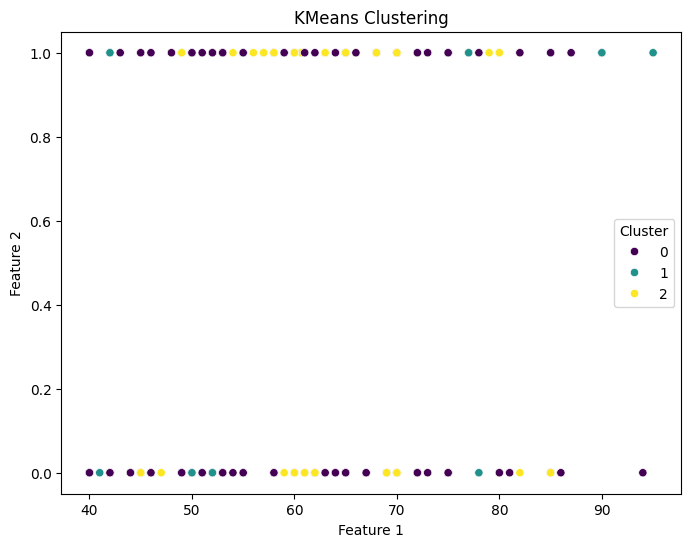

In [20]:
# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['kmeans_cluster'] = kmeans.fit_predict(data_imputed)

# Print cluster centers and labels
print("KMeans Cluster Centers:")
print(kmeans.cluster_centers_)
print("KMeans Labels (First 5 rows):")
print(data['kmeans_cluster'].head())

# Visualization of KMeans Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x=data_imputed.iloc[:, 0], y=data_imputed.iloc[:, 1], hue='kmeans_cluster', palette='viridis')
plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")
plt.show()

###Agglomerative Clustering

Agglomerative Clustering Labels (First 5 rows):
0    0
1    0
2    2
3    0
4    0
Name: agglo_cluster, dtype: int64


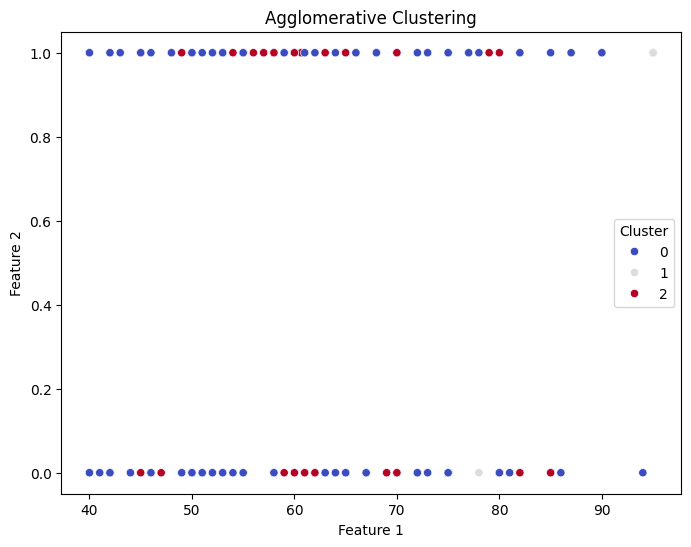

In [21]:
# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
data['agglo_cluster'] = agg_clustering.fit_predict(data_imputed)

# Print Agglomerative Clustering labels
print("Agglomerative Clustering Labels (First 5 rows):")
print(data['agglo_cluster'].head())

# Visualization of Agglomerative Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x=data_imputed.iloc[:, 0], y=data_imputed.iloc[:, 1], hue='agglo_cluster', palette='coolwarm')
plt.title("Agglomerative Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")
plt.show()

###Gaussian Mixture Model Clustering

Gaussian Mixture Model Means:
[[6.08504630e+01 4.86711571e-01 3.30147963e+02 4.53948419e-01
  3.85979736e+01 3.74413773e-01 2.66211366e+05 1.13003238e+00
  1.36704209e+02 6.37010082e-01 3.19873339e-01 1.31494645e+02
  2.65208665e-01 6.65317544e-01]
 [6.24606248e+01 2.60275042e-01 1.80357714e+03 3.51106833e-01
  3.74509589e+01 2.94103996e-01 3.00603779e+05 1.92623103e+00
  1.37184581e+02 7.46538355e-01 3.18979918e-01 1.35222856e+02
  3.96709910e-01 7.92441281e-01]
 [5.81794398e+01 3.49149504e-01 2.63331639e+02 2.95393321e-01
  3.58131324e+01 2.93200987e-01 1.86892322e+05 2.23284794e+00
  1.35249440e+02 5.60159587e-01 3.31936543e-01 1.15744319e+02
  5.46055826e-01 6.17158747e-01]]
GMM Labels (First 5 rows):
0    0
1    1
2    2
3    2
4    0
Name: gmm_cluster, dtype: int64


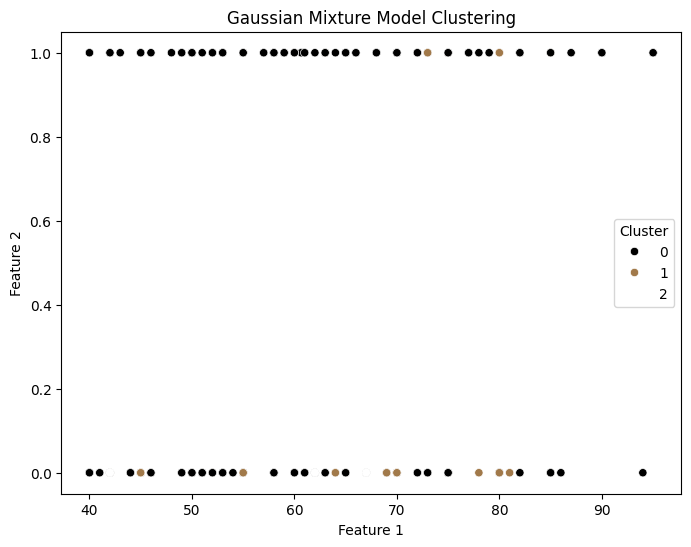

In [22]:
# Gaussian Mixture Model Clustering
gmm = GaussianMixture(n_components=3, random_state=42)
data['gmm_cluster'] = gmm.fit_predict(data_imputed)

# Print GMM parameters and labels
print("Gaussian Mixture Model Means:")
print(gmm.means_)
print("GMM Labels (First 5 rows):")
print(data['gmm_cluster'].head())

# Visualization of Gaussian Mixture Model Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x=data_imputed.iloc[:, 0], y=data_imputed.iloc[:, 1], hue='gmm_cluster', palette='cubehelix')
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")
plt.show()

###Outlier Detection using Local Outlier Factor

LOF Outlier Detection Labels (First 5 rows):
0   -1
1   -1
2    1
3    1
4    1
Name: outlier_lof, dtype: int64


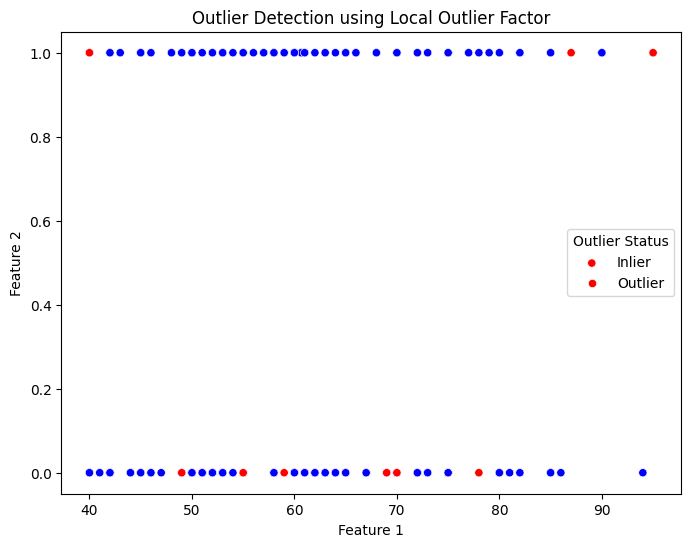

In [23]:
# Outlier Detection with Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20)
data['outlier_lof'] = lof.fit_predict(data_imputed)

# Print LOF labels (where -1 indicates an outlier)
print("LOF Outlier Detection Labels (First 5 rows):")
print(data['outlier_lof'].head())

# Visualization of Outlier Detection
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x=data_imputed.iloc[:, 0], y=data_imputed.iloc[:, 1], hue='outlier_lof', palette={1: 'blue', -1: 'red'})
plt.title("Outlier Detection using Local Outlier Factor")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Outlier Status", labels=["Inlier", "Outlier"])
plt.show()

# Module 6:
###Dimensionality Reduction
### PCA for Dimensionality Reduction and Visualization

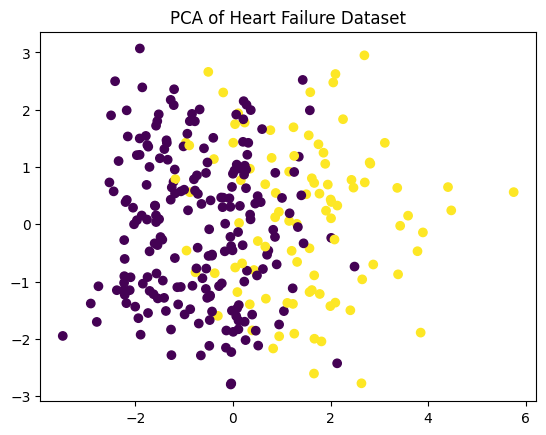

In [24]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_imputed)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data['DEATH_EVENT'])
plt.title('PCA of Heart Failure Dataset')
plt.show()

### Multidimensional Scaling (MDS)

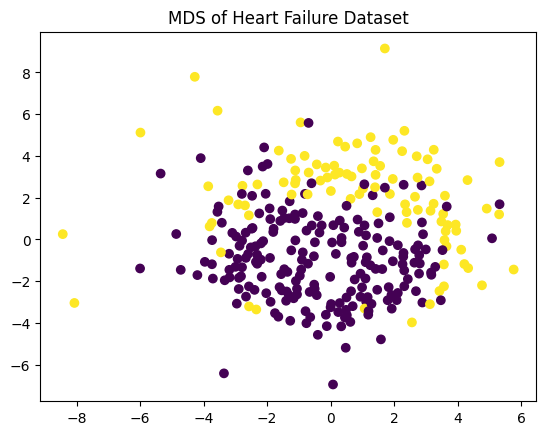

In [25]:
mds = MDS(n_components=2)
mds_data = mds.fit_transform(scaled_data)
plt.scatter(mds_data[:, 0], mds_data[:, 1], c=data['DEATH_EVENT'])
plt.title('MDS of Heart Failure Dataset')
plt.show()

# Module 7:
###Model Development and Evaluation
### Supervised Learning Model - Linear Regression

### Linear Regression Model

Missing values after imputation:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


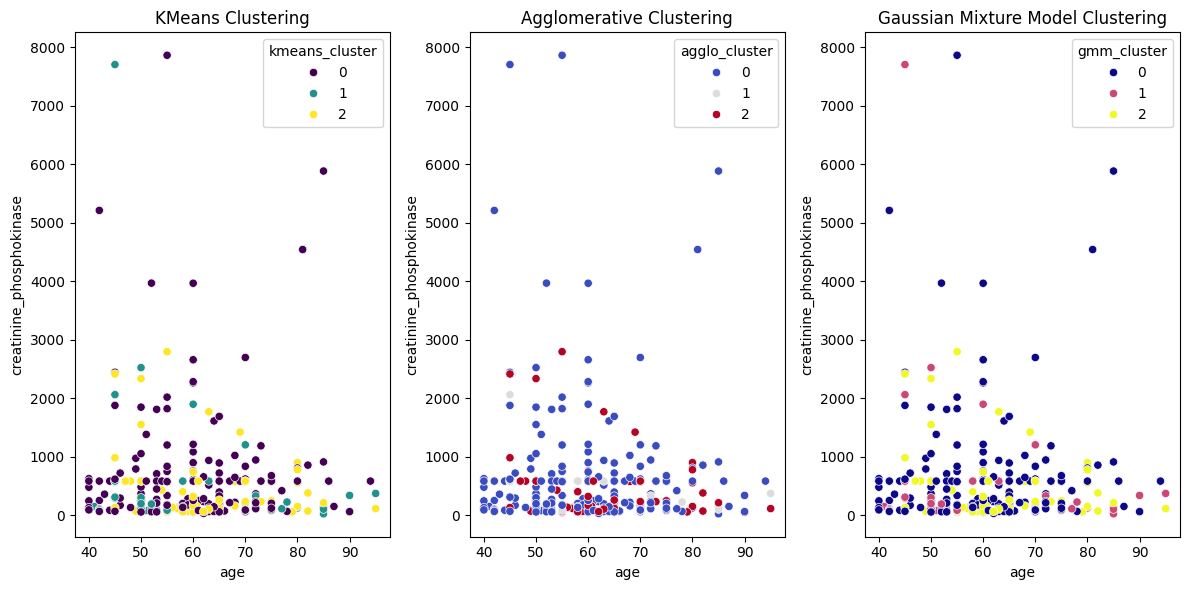

In [29]:
# Load the dataset
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Step 1: Data Cleaning and Imputation
# Replace non-numeric placeholders like '?' or 'NA' with NaN for imputation
data.replace('?', np.nan, inplace=True)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy="mean")
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Confirm missing values are handled
print("Missing values after imputation:\n", data_imputed.isnull().sum())

# Step 2: Clustering Algorithms
# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data_imputed['kmeans_cluster'] = kmeans.fit_predict(data_imputed)

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
data_imputed['agglo_cluster'] = agg_clustering.fit_predict(data_imputed)

# Gaussian Mixture Model Clustering
gmm = GaussianMixture(n_components=3, random_state=42)
data_imputed['gmm_cluster'] = gmm.fit_predict(data_imputed)

# Outlier Detection using Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20)
data_imputed['outlier_lof'] = lof.fit_predict(data_imputed)

# Visualize Clustering Results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x=data_imputed['age'], y=data_imputed['creatinine_phosphokinase'], hue=data_imputed['kmeans_cluster'], palette="viridis")
plt.title("KMeans Clustering")

plt.subplot(1, 3, 2)
sns.scatterplot(x=data_imputed['age'], y=data_imputed['creatinine_phosphokinase'], hue=data_imputed['agglo_cluster'], palette="coolwarm")
plt.title("Agglomerative Clustering")

plt.subplot(1, 3, 3)
sns.scatterplot(x=data_imputed['age'], y=data_imputed['creatinine_phosphokinase'], hue=data_imputed['gmm_cluster'], palette="plasma")
plt.title("Gaussian Mixture Model Clustering")

plt.tight_layout()
plt.show()

In [31]:
X = data_imputed.drop(columns=['DEATH_EVENT', 'kmeans_cluster', 'agglo_cluster', 'gmm_cluster', 'outlier_lof'])
y = data_imputed['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Predictions:
 [ 0.16323077 -0.14543759  0.26115822  1.5836396   0.26694411  0.01461554
  0.5178093   0.2716999   0.82270362  0.21474095  0.27066915  0.13681366
  0.2292986   0.33449056  0.34755699  0.55731997  0.10319884  0.39528436
  0.26919949  0.41278509  0.42793775  0.38540869  0.28631482  0.54830751
  0.51980947 -0.13186092  0.02330406  0.17385043  0.24962373 -0.09157677
  0.68301628 -0.0749622   0.59964078  0.86916613  0.56400965  0.40159821
  0.26819024  0.22829722  0.35756508  0.14345339  0.46897599  0.76207466
  0.10953698  0.26268474  0.49119577  0.21406136  0.33939937  0.04671611
  0.08865006 -0.02584007  0.50231324  0.00657618  0.51970727 -0.11210831
  0.0110606   0.37497429  0.1027752   0.7141813   0.16851322  0.70482631]


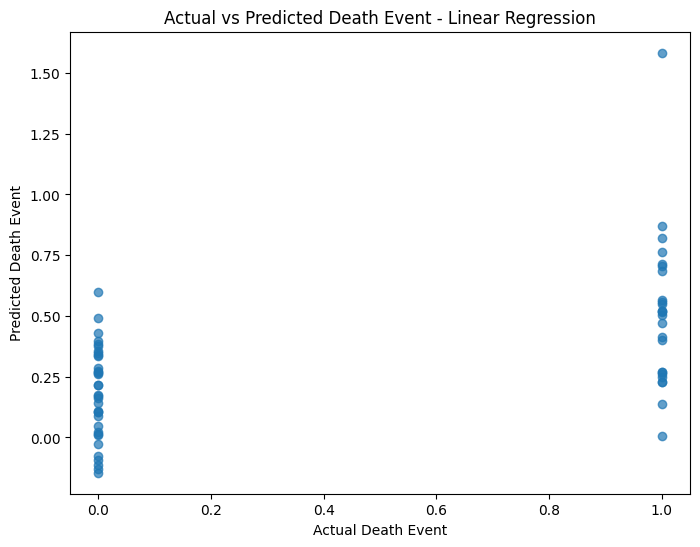

In [32]:
inear_model = LinearRegression()

# Check for any remaining NaN values in X_train or X_test before fitting
if X_train.isnull().sum().sum() == 0 and X_test.isnull().sum().sum() == 0:
    # Fit the model
    linear_model.fit(X_train, y_train)
    # Make predictions
    y_pred = linear_model.predict(X_test)

    # Print results
    print("Predictions:\n", y_pred)
else:
    print("There are still missing values in the dataset. Check preprocessing steps.")

# Optionally, visualize regression results or performance (e.g., scatter plot or performance metrics)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Death Event")
plt.ylabel("Predicted Death Event")
plt.title("Actual vs Predicted Death Event - Linear Regression")
plt.show()

### Evaluate Linear Regression Model

In [33]:
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression - Mean Squared Error:", mse)

Linear Regression - Mean Squared Error: 0.17856149699714016


### Convert to binary predictions for accuracy evaluation (using 0.5 as threshold)

In [34]:
y_pred_class = [1 if prob >= 0.5 else 0 for prob in y_pred]
accuracy = accuracy_score(y_test, y_pred_class)
print("Linear Regression - Accuracy:", accuracy)

Linear Regression - Accuracy: 0.8


### Classification Model - Support Vector Machine

In [36]:
from sklearn.svm import SVR

# Initialize and train SVR model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Display predictions
print("SVM Regression Predictions:\n", y_pred_svm)

SVM Regression Predictions:
 [-9.41616612e+03 -3.57538836e+03  3.86396010e+03  1.69309956e+03
 -1.88548719e+03 -4.09964926e+03 -1.49734425e+03  8.69346952e+03
 -1.86342800e+03 -2.73702907e+03 -4.60882484e+03 -4.94513167e+03
 -3.59401520e+03 -2.73088796e+03 -9.60715645e+02  1.79254266e+04
 -2.28830218e+03 -1.46673400e+01  2.69313292e+03 -1.65808559e+03
 -2.28378571e+03 -2.58225901e+03 -4.64307086e+03  2.96949855e+03
 -1.53724987e+03 -2.63282597e+03 -1.81962631e+03 -4.38714785e+03
 -4.76050937e+03 -6.19766737e+03  1.26039543e+03 -5.91648163e+03
  1.30861533e+03  1.10097524e+03  1.08864158e+03  9.72355823e+02
 -2.95002879e+03 -4.00220245e+03 -2.55388949e+03 -2.93420170e+03
 -7.29329079e+02 -1.98667021e+03 -6.23283897e+03 -2.93006613e+03
 -1.87715141e+03 -3.86302729e+03 -5.96651318e+02 -4.46234763e+03
 -1.73634442e+03 -5.26255916e+03  1.55781592e+03 -6.48091470e+03
  8.35570941e+02 -2.93718802e+03 -9.19732198e+03 -4.50089055e+03
 -4.67802287e+03 -1.78516440e+03 -2.99169610e+03  7.31352443e

### Evaluate SVM Model

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_test is continuous for regression
y_pred_svm = svm_model.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred_svm)
mse = mean_squared_error(y_test, y_pred_svm)
r2 = r2_score(y_test, y_pred_svm)

print("SVR - Mean Absolute Error:", mae)
print("SVR - Mean Squared Error:", mse)
print("SVR - R^2 Score:", r2)

SVR - Mean Absolute Error: 3400.3260546999577
SVR - Mean Squared Error: 19385446.64320843
SVR - R^2 Score: -79757265.1892004


In [39]:
# Convert continuous values to binary classes (example)
y_test_binary = (y_test >= 0.5).astype(int)  # Example thresholding
y_pred_svm_binary = (y_pred_svm >= 0.5).astype(int)  # Convert predictions similarly

# Calculate accuracy
svm_accuracy = accuracy_score(y_test_binary, y_pred_svm_binary)
print("SVM - Accuracy:", svm_accuracy)


SVM - Accuracy: 0.75
